In [1]:
# import various modules
import metadatabase as mdb
from data import Data
from data_prep import DataPrep
import matplotlib.pyplot as plt
import numpy as np
from preprocess import Preprocess

### Practicing loading + handling metadata

(Only use when on Niagara, or when raw data is available)

In [8]:
data_path='/home/s/sievers/lauriea/prizm-analysis/selections/'
data_file='2021_100MHz_EW_Partial.p'
database = Data.via_metadatabase(selection=data_path+data_file)

In [9]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [10]:
print(mdb._directories['metadata'])

/home/s/sievers/lauriea/prizm-analysis


In [11]:
database.partition(instruments=['100MHz'], channels=['EW'],buffer=(1,1))

In [12]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [13]:
database.lst(instruments=['100MHz'],channels=['EW'])

In [14]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [15]:
testdata = np.array(database.get(data='pol',instrument='100MHz',channel='EW',partition='antenna'))

In [16]:
print(testdata.shape)
# (number of spectra, number of frequency channels)

(165328, 4096)


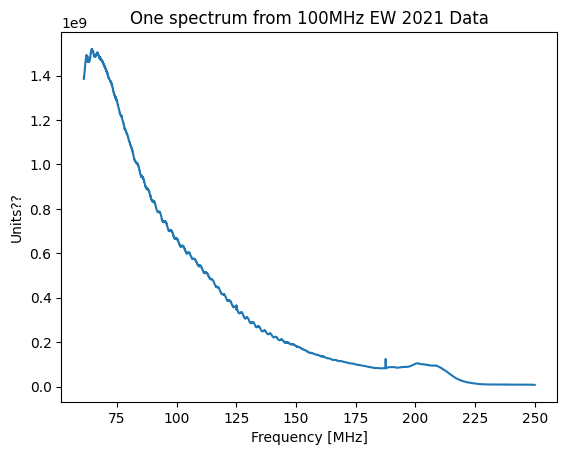

In [17]:
freqarray=np.linspace(0,250,len(testdata[0]))
# plt.plot(freqarray,testdata[0])
plt.plot(freqarray[1000:],testdata[3000,1000:])
# plt.imshow(testdata)
plt.title('One spectrum from 100MHz EW 2021 Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Units??')
plt.show()
# print(len(testdata))

In [ ]:
# Trying to use DataPrep
datapreptest = DataPrep(instrument='100MHz',channel='EW',year='2021')

In [53]:
caldata = datapreptest('GSM')

In [58]:
datamaybe = caldata[0]
print(datamaybe.shape)
lstmaybe = caldata[1]
print(lstmaybe.shape)

(165328, 4096)
(165328,)


### Testing analysis functions using test data downloaded from Niagara

In [2]:
# Data location
test_data_directory = '/home/lauriea/prizm/test_data/'
year = '2021'
instrument = '100'
channel = 'EW'

# test_data_path = test_data_directory + 'data' + '_' + year + '_' +
file_ending = '_' + year + '_' + instrument + channel + '.npy'

In [3]:
with open(test_data_directory + 'data' + file_ending, 'rb') as f:
    testdata = np.load(f)

In [4]:
print(testdata)

[[1.46750672e+11 2.47341228e+10 2.78847466e+08 ... 8.04723800e+06
  7.97381400e+06 7.73301200e+06]
 [1.49687317e+11 2.47532999e+10 2.79027434e+08 ... 8.02330600e+06
  7.99436600e+06 7.73434600e+06]
 [1.54156166e+11 2.47442212e+10 2.78885766e+08 ... 8.03373000e+06
  7.98416200e+06 7.73604600e+06]
 ...
 [1.49406462e+11 2.69378937e+10 2.53497296e+08 ... 7.98699400e+06
  7.98581400e+06 7.70532400e+06]
 [1.47830473e+11 2.69419964e+10 2.53849978e+08 ... 7.98077800e+06
  7.96805800e+06 7.71375400e+06]
 [1.53444785e+11 2.69468444e+10 2.53678626e+08 ... 8.00375200e+06
  7.97064000e+06 7.69163200e+06]]


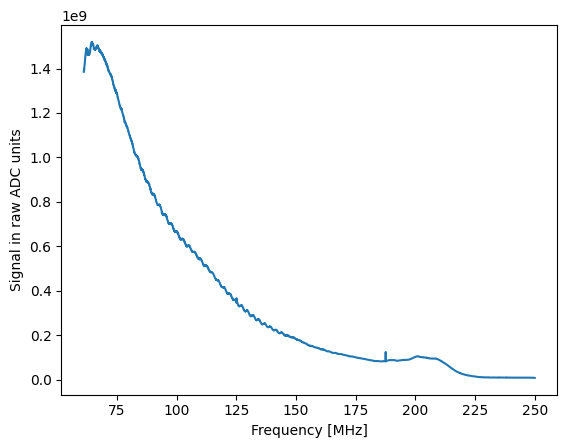

In [9]:
freqarray=np.linspace(0,250,len(testdata[0])) # from PRIZM instrument paper
plt.plot(freqarray[1000:],testdata[3000,1000:])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

In [3]:
# Using preprocess.py
preprocess = Preprocess(file_ending, test_data_directory)
data, lst, systime, day_splits = preprocess()

In [5]:
import preprocess as pp

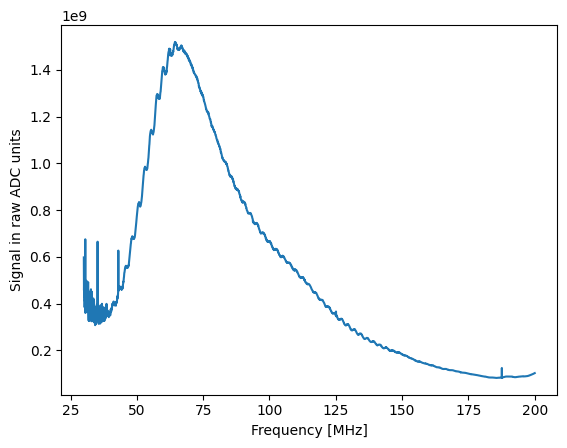

In [6]:
# freqarray=np.linspace(0,250,len(data[0])) # from PRIZM instrument paper
freqarray=pp.xrange()
plt.plot(freqarray,data[3000])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

(165328, 2785)
[5.04370606e+08 3.60109868e+08 4.38271090e+08 ... 1.01272952e+08
 1.01539156e+08 1.02191860e+08]


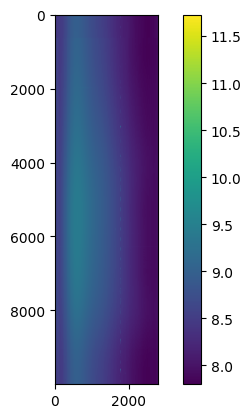

In [9]:
print(np.shape(data))
print(data[0])
plt.imshow(np.log10(data[5000:15000]))
plt.colorbar()
plt.show()